In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt

In [11]:
# Load the time series dataset
data = pd.read_csv('../datasets/no1_aggregated/no1_2022_aggregated.csv')
data.drop(columns='end MTU (UTC)', axis=1, inplace=True)
data.fillna(method='ffill', inplace=True)

# Change column names to match prophet naming convention
data = data.rename(columns={'start MTU (UTC)': 'ds', 'Day-ahead Price [EUR/MWh] BZN|NO1': 'y'})

# Split the dataset into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Create the feature and target arrays
X_train, y_train = train_data.drop(columns=['ds', 'y']), train_data['y']
X_test, y_test = test_data.drop(columns=['ds', 'y']), test_data['y']

X_train.head()

,Day-ahead Price [EUR/MWh] BZN|NO2,Day-ahead Price [EUR/MWh] BZN|NO3,Day-ahead Price [EUR/MWh] BZN|NO5,Day-ahead Price [EUR/MWh] BZN|SE3,Actual Total Load [MW] - BZN|NO1,Actual Total Load [MW] - BZN|NO2,Actual Total Load [MW] - BZN|NO3,Actual Total Load [MW] - BZN|NO5,Actual Total Load [MW] - BZN|SE3,Fossil Gas - BZN|NO1,...,CBF BZN|NO1 > BZN|NO3 [MW],CBF BZN|NO5 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|NO5 [MW],CBF BZN|SE3 > BZN|NO1 [MW],CBF BZN|NO1 > BZN|SE3 [MW],Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO1,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO2,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO3,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|NO5,Stored Energy Value Water Reservoirs and Hydro Storage Plants [MWh] - BZN|SE3
0,129.30,41.33,129.30,41.33,4701,4440,3463,1991,9612,0,...,0,594,0,1065,0,3204274.0,16810140.0,5688093.0,8631916.0,1656000.0
1,132.08,42.18,132.08,42.18,4681,4480,3388,1969,9601,0,...,0,676,0,927,0,3204274.0,16810140.0,5688093.0,8631916.0,1656000.0
2,111.44,44.37,111.44,44.37,4620,4424,3387,1911,9552,0,...,0,436,0,748,0,3204274.0,16810140.0,5688093.0,8631916.0,1656000.0
3,112.35,37.67,112.35,37.67,4645,4386,3376,1996,9449,0,...,0,345,0,918,0,3204274.0,16810140.0,5688093.0,8631916.0,1656000.0
4,113.90,39.70,113.90,39.70,4670,4375,3427,1953,9614,0,...,0,412,0,826,0,3204274.0,16810140.0,5688093.0,8631916.0,1656000.0


In [12]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training set
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make a prediction on the testing set
predicted_values = model.predict(X_test)

# Calculate the mean absolute error (MAE) between the predicted and actual values
mae = mean_absolute_error(y_test, predicted_values)
print("Mean absolute error:            ", mae)

# Calculate the mean absolute percentage error (MAE) between the predicted and actual values
mape = mean_absolute_percentage_error(y_test, predicted_values)
print("Mean absolute percentage error: ", mape)

# Calculating the mean squared error (MSE) between the predicted and actual values
mse = mean_squared_error(y_test, predicted_values)
print("Mean squared error:             ", mse)

# Calculating the root mean squared error (RMSE) between the predicted and actual values
rmse = math.sqrt(mse)
print("Rood mean squared error:        ", rmse)


Mean absolute error:             8.938671552485014
Mean absolute percentage error:  0.360022452420016
Mean squared error:              115.61711532376489
Rood mean squared error:         10.752539947554945


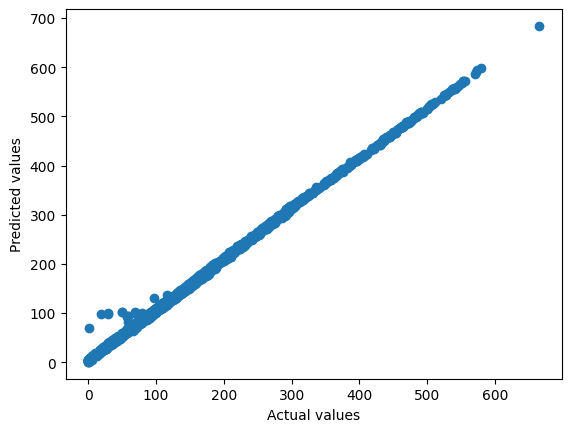

In [14]:
# Plot the predicted values against the actual values
plt.plot(y_test, predicted_values, 'o')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()